In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter


file_name = 'Quant_finance_companies_uk.csv'
df = pd.read_csv(file_name)

In [4]:
df.head()

,Company,Location,Focus
0,Winton,London,Systematic investment management
1,Man Group,London,"Quant strategies, largest publicly traded hedg..."
2,Aspect Capital,London,Quantitative investment management
3,GSA Capital,London,Quant trading across asset classes
4,Capula Investment Management,London,"Fixed-income trading, tail-risk hedging"


In [5]:
# Analyze the location distribution
location_counts = df['Location'].value_counts()
print("\nLocation Distribution:")
print(location_counts)


Location Distribution:
Location
London    99
Oxford     1
Name: count, dtype: int64



Top 10 Focus Areas:
Focus
Quant finance              18
Quant trading              12
trading                     8
Quant research              6
hedge fund                  5
research                    5
Quantitative strategies     4
Quant hedge fund            4
systematic strategies       4
risk management             3
Name: count, dtype: int64


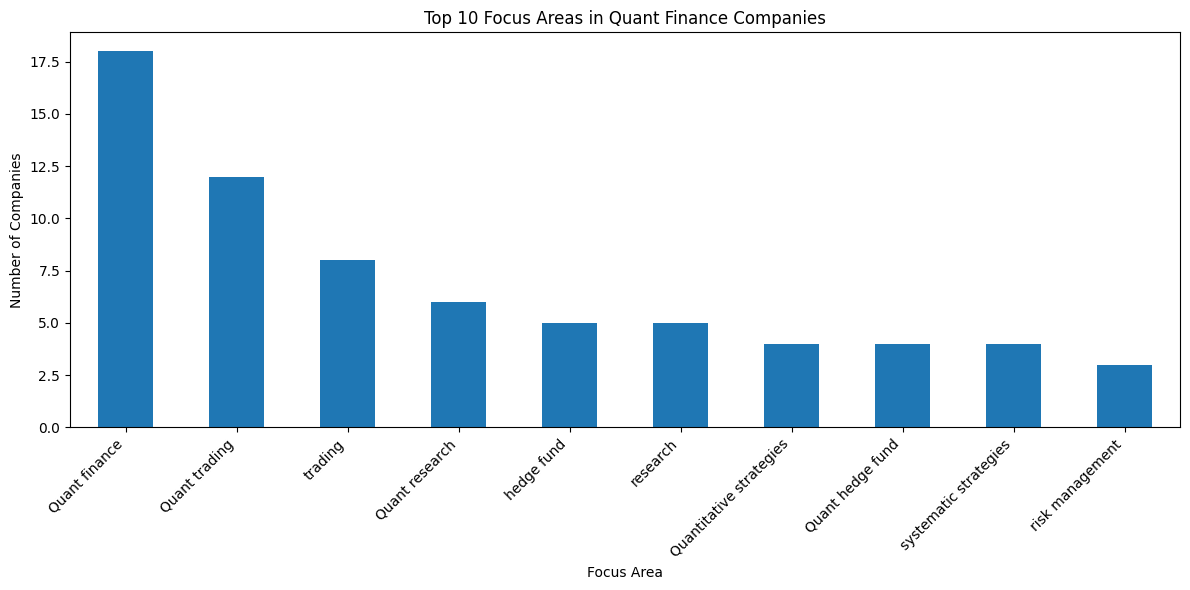

In [8]:
# Analyze the focus areas
focus_areas = df['Focus'].str.split(',').explode().str.strip()
focus_counts = focus_areas.value_counts().head(10)
print("\nTop 10 Focus Areas:")
print(focus_counts)

# Visualize the top focus areas
plt.figure(figsize=(12, 6))
focus_counts.plot(kind='bar')
plt.title('Top 10 Focus Areas in Quant Finance Companies')
plt.xlabel('Focus Area')
plt.ylabel('Number of Companies')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Company Types:
Counter({'hedge fund': 23, 'proprietary trading': 2, 'asset manage': 2, 'investment bank': 2})


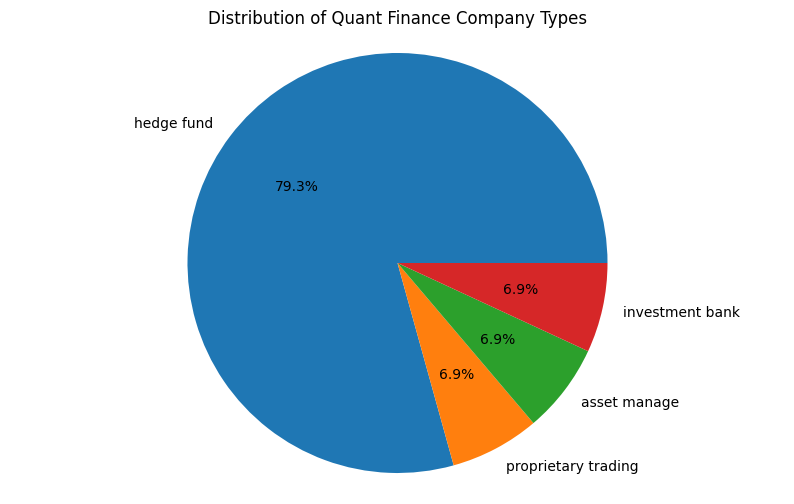

In [9]:
# Analyze companies by type
company_types = df['Focus'].str.lower().str.findall('hedge fund|asset manage|proprietary trading|investment bank')
company_type_counts = Counter([item for sublist in company_types for item in sublist])
print("\nCompany Types:")
print(company_type_counts)

# Visualize company types
plt.figure(figsize=(10, 6))
plt.pie(company_type_counts.values(), labels=company_type_counts.keys(), autopct='%1.1f%%')
plt.title('Distribution of Quant Finance Company Types')
plt.axis('equal')
plt.show()


Companies mentioning specific technologies or strategies:
{'AI/ML': 10, 'Systematic': 12, 'Algorithmic': 5, 'Quantitative': 24}


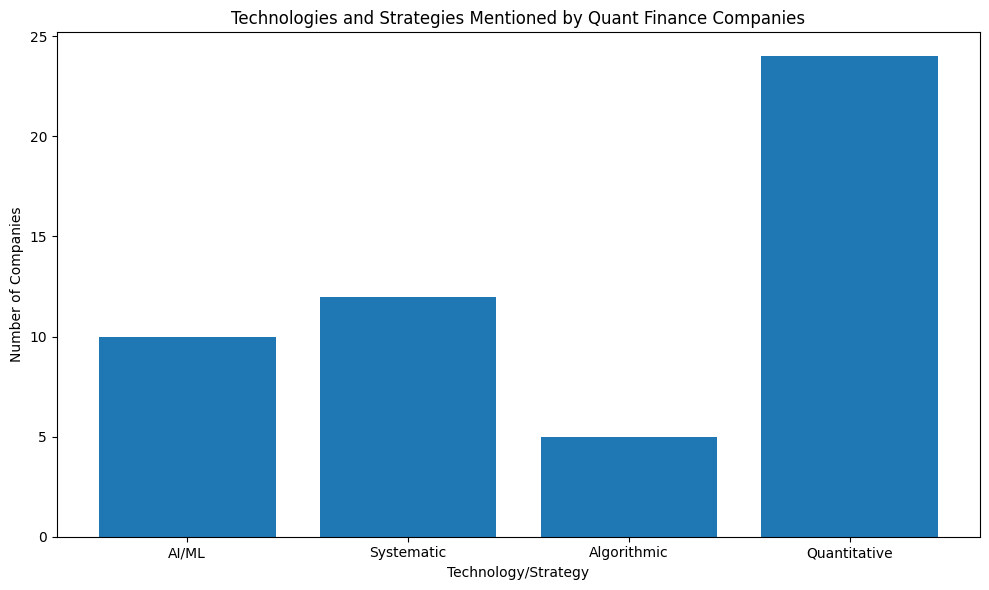

In [10]:

# Analyze companies mentioning specific technologies or strategies
tech_strategies = {
    'AI/ML': df['Focus'].str.contains('AI|machine learning', case=False).sum(),
    'Systematic': df['Focus'].str.contains('systematic', case=False).sum(),
    'Algorithmic': df['Focus'].str.contains('algorithmic', case=False).sum(),
    'Quantitative': df['Focus'].str.contains('quantitative', case=False).sum()
}
print("\nCompanies mentioning specific technologies or strategies:")
print(tech_strategies)

# Visualize technologies and strategies
plt.figure(figsize=(10, 6))
plt.bar(tech_strategies.keys(), tech_strategies.values())
plt.title('Technologies and Strategies Mentioned by Quant Finance Companies')
plt.xlabel('Technology/Strategy')
plt.ylabel('Number of Companies')
plt.tight_layout()
plt.show()